# draft

## import

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Define some funtions

In [2]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

## GPU 실험 

### cpu

In [3]:
x = torch.randn([20000,4])
y = torch.randn([20000,4])

In [4]:
rnn = torch.nn.RNN(4,20)
linr = torch.nn.Linear(20,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss()

In [5]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x,_water)
    yhat = linr(hidden)
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
    
t2 = time.time()
t2-t1

93.93624830245972

### gpu

In [6]:
x = torch.randn([20000,4]).to("cuda:0")
y = torch.randn([20000,4]).to("cuda:0")

In [7]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss()

In [8]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water)
    yhat = linr(hidden)
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
    
t2 = time.time()
t2-t1

3.090775489807129

- 왜 빨라..?

### cpu (역전파삭제) 

In [9]:
x = torch.randn([20000,4])
y = torch.randn([20000,4])

In [10]:
rnn = torch.nn.RNN(4,20)
linr = torch.nn.Linear(20,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss()

In [11]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x,_water)
    yhat = linr(hidden)
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
#    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
    
t2 = time.time()
t2-t1

18.86418318748474

### gpu (역전파삭제)

In [12]:
x = torch.randn([20000,4]).to("cuda:0")
y = torch.randn([20000,4]).to("cuda:0")

In [13]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss()

In [14]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water)
    yhat = linr(hidden)
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
#    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
    
t2 = time.time()
t2-t1

1.2390961647033691

## Exam5: abcabC

### data

In [15]:
txt = list('abcabC')*100
txt[:5]

['a', 'b', 'c', 'a', 'b']

In [16]:
n_words = 4

In [17]:
mapping = {'a':0, 'b':1, 'c':2, 'C':3}

In [18]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [19]:
txt_x[:10],txt_y[:10]

(['a', 'b', 'c', 'a', 'b', 'C', 'a', 'b', 'c', 'a'],
 ['b', 'c', 'a', 'b', 'C', 'a', 'b', 'c', 'a', 'b'])

In [20]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [21]:
x,y

(tensor([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         ...,
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.]]),
 tensor([[0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 0., 1.]]))

In [22]:
x=x.to("cuda:0")
y=y.to("cuda:0")

### RNN

In [23]:
n_features = 3

In [24]:
torch.manual_seed(43052)
rnn = torch.nn.RNN(n_words,n_features)
linr = torch.nn.Linear(n_features,n_words) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))

In [25]:
rnn.to("cuda:0")
linr.to("cuda:0")

Linear(in_features=3, out_features=4, bias=True)

`-` 3000 epochs

In [26]:
_water = torch.zeros(1,n_features).to("cuda:0")

In [27]:
for epoc in range(3000):
    ## step1 
    hidden, hT = rnn(x,_water)
    output = linr(hidden)
    ## step2 
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [28]:
yhat=soft(output)

In [29]:
combinded = torch.concat([hidden,yhat],axis=1)

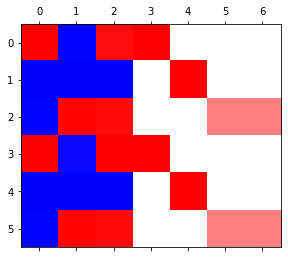

In [30]:
plt.matshow(combinded.to("cpu").data[-6:],cmap='bwr')

`-` 6000 epochs

In [31]:
for epoc in range(3000):
    ## step1 
    hidden, hT = rnn(x,_water)
    output = linr(hidden)
    ## step2 
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [32]:
yhat=soft(output)

In [33]:
combinded = torch.concat([hidden,yhat],axis=1)

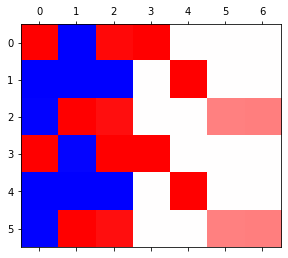

In [34]:
plt.matshow(combinded.to("cpu").data[-6:],cmap='bwr')

`-` 9000 epochs

In [35]:
for epoc in range(3000):
    ## step1 
    hidden, hT = rnn(x,_water)
    output = linr(hidden)
    ## step2 
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [36]:
yhat=soft(output)

In [37]:
combinded = torch.concat([hidden,yhat],axis=1)

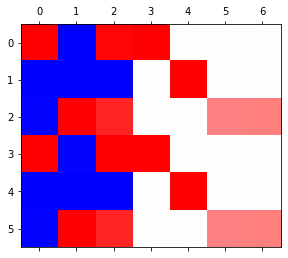

In [38]:
plt.matshow(combinded.to("cpu").data[-6:],cmap='bwr')

`-` 12000 epochs

In [39]:
for epoc in range(3000):
    ## step1 
    hidden, hT = rnn(x,_water)
    output = linr(hidden)
    ## step2 
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [40]:
yhat=soft(output)

In [41]:
combinded = torch.concat([hidden,yhat],axis=1)

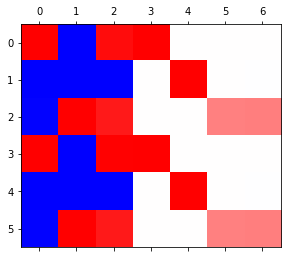

In [42]:
plt.matshow(combinded.to("cpu").data[-6:],cmap='bwr')

`-` 15000 epochs

In [43]:
for epoc in range(3000):
    ## step1 
    hidden, hT = rnn(x,_water)
    output = linr(hidden)
    ## step2 
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [44]:
yhat=soft(output)

In [45]:
combinded = torch.concat([hidden,yhat],axis=1)

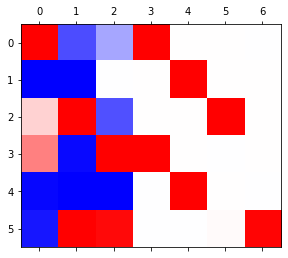

In [46]:
plt.matshow(combinded.to("cpu").data[-6:],cmap='bwr')

### LSTM

`-` LSTM

In [47]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(n_words,n_features)
linr = torch.nn.Linear(n_features,n_words) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()))

In [48]:
lstm.to("cuda:0")
linr.to("cuda:0")

Linear(in_features=3, out_features=4, bias=True)

`-` 3000 epochs

In [49]:
for epoc in range(3000):
    ## step1 
    hidden, (hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden)
    ## step2 
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [50]:
yhat=soft(output)

In [51]:
combind = torch.concat([hidden,yhat],axis=1)

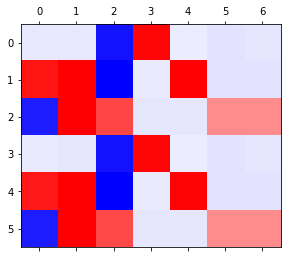

In [52]:
plt.matshow(combind.to("cpu").data[-6:],cmap='bwr')

`-` 6000 epochs

In [53]:
for epoc in range(3000):
    ## step1 
    hidden, (hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden)
    ## step2 
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [54]:
yhat=soft(output)

In [55]:
combind = torch.concat([hidden,yhat],axis=1)

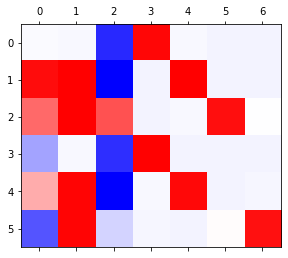

In [56]:
plt.matshow(combind.to("cpu").data[-6:],cmap='bwr')

### RNN vs LSTM 성능비교실험

`-` RNN 

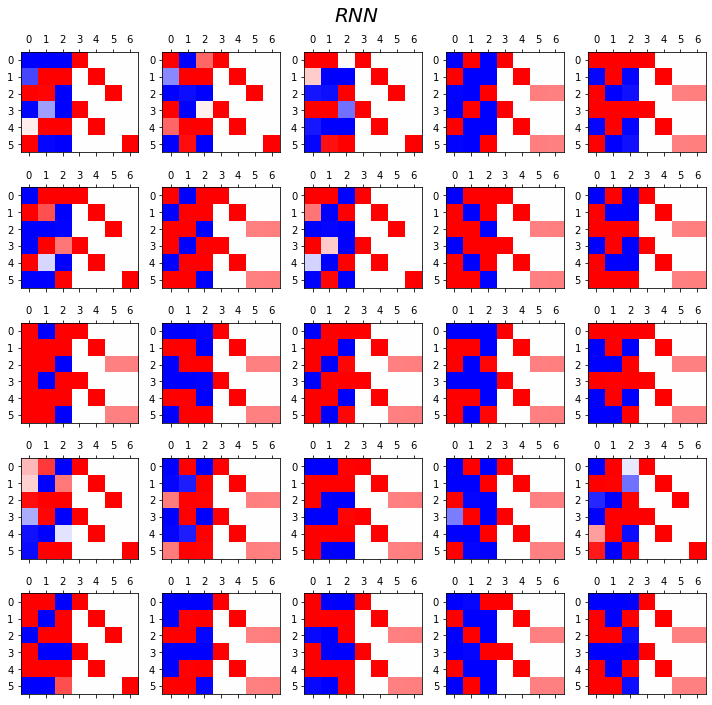

In [57]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(n_words,n_features).to("cuda:0")
        linr = torch.nn.Linear(n_features,n_words).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        for epoc in range(3000):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr')
fig.suptitle(r"$RNN$",size=20)
fig.tight_layout()

`-` LSTM

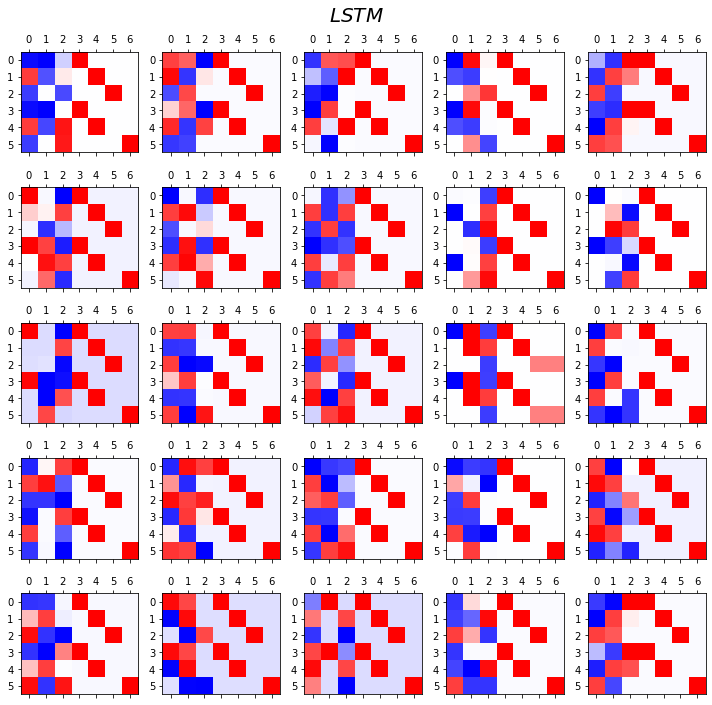

In [58]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(n_words,n_features).to("cuda:0")
        linr = torch.nn.Linear(n_features,n_words).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        for epoc in range(3000):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr')
fig.suptitle(r"$LSTM$",size=20)
fig.tight_layout()

## Exam6: abcdabcD

### data

In [59]:
txt = list('abcdabcD')*100
txt[:5]

['a', 'b', 'c', 'd', 'a']

In [60]:
n_words = 5

In [61]:
mapping = {'a':0, 'b':1, 'c':2, 'd':3, 'D':4}

In [62]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [63]:
txt_x[:10],txt_y[:10]

(['a', 'b', 'c', 'd', 'a', 'b', 'c', 'D', 'a', 'b'],
 ['b', 'c', 'd', 'a', 'b', 'c', 'D', 'a', 'b', 'c'])

In [64]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [65]:
x,y

(tensor([[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         ...,
         [1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.]]),
 tensor([[0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         ...,
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1.]]))

In [66]:
x=x.to("cuda:0")
y=y.to("cuda:0")

### RNN vs LSTM 성능비교실험

In [67]:
n_features = 4

In [68]:
_water = torch.zeros(1,n_features).to("cuda:0")

`-` RNN 

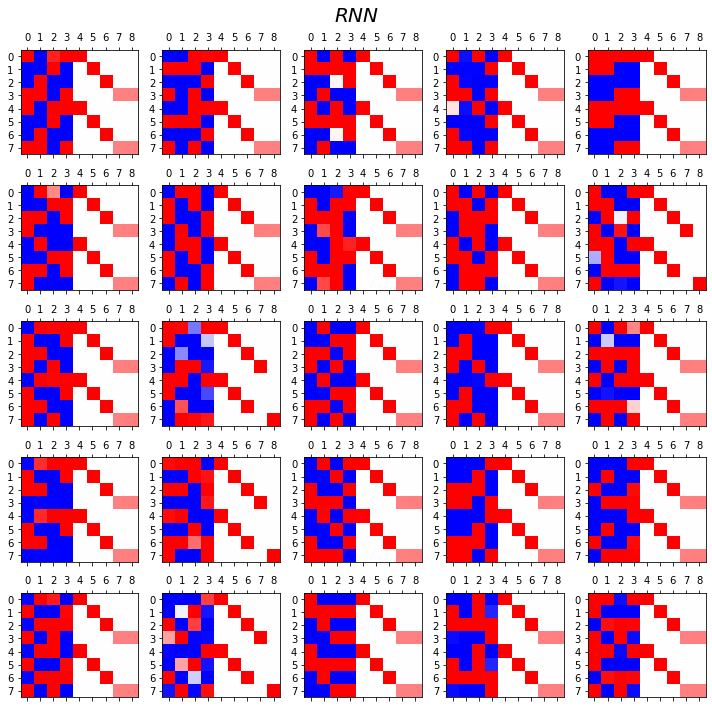

In [69]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(n_words,n_features).to("cuda:0")
        linr = torch.nn.Linear(n_features,n_words).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        for epoc in range(3000):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-8:],cmap='bwr')
fig.suptitle(r"$RNN$",size=20)
fig.tight_layout()

`-` LSTM

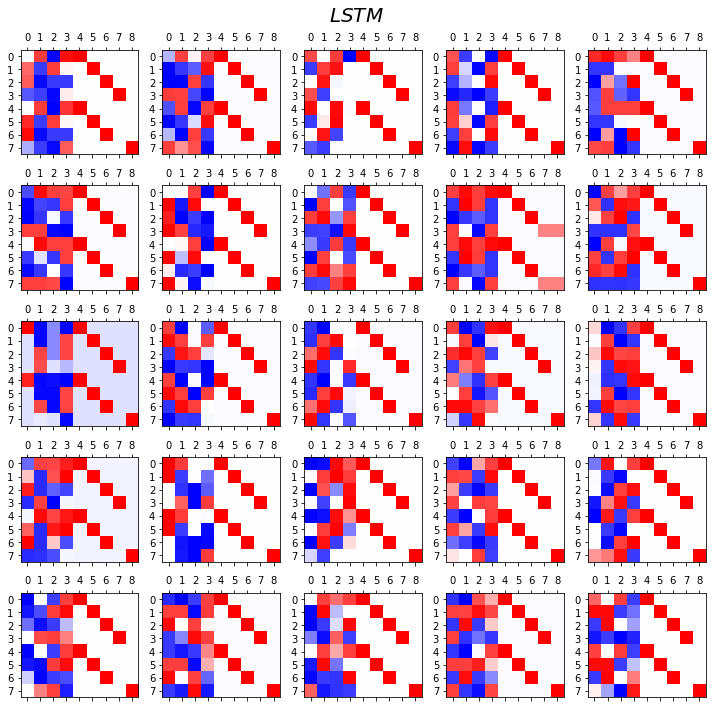

In [70]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(n_words,n_features).to("cuda:0")
        linr = torch.nn.Linear(n_features,n_words).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        for epoc in range(3000):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-8:],cmap='bwr')
fig.suptitle(r"$LSTM$",size=20)
fig.tight_layout()

`-` 관찰1: LSTM이 확실히 장기기억에 강하다. 

`-` 관찰2: LSTM은 hidden에 0도 잘쓴다. (0도 의미있게 쓴다) 

## LSTM의 계산과정

### data: abaB

In [71]:
txt = list('abaB')*100
txt[:5]

['a', 'b', 'a', 'B', 'a']

In [72]:
n_words = 3

In [73]:
mapping = {'a':0, 'b':1, 'B':2}

In [74]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [75]:
txt_x[:10],txt_y[:10]

(['a', 'b', 'a', 'B', 'a', 'b', 'a', 'B', 'a', 'b'],
 ['b', 'a', 'B', 'a', 'b', 'a', 'B', 'a', 'b', 'a'])

In [76]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [77]:
x,y

(tensor([[1., 0., 0.],
         [0., 1., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [0., 1., 0.],
         [1., 0., 0.]]),
 tensor([[0., 1., 0.],
         [1., 0., 0.],
         [0., 0., 1.],
         ...,
         [0., 1., 0.],
         [1., 0., 0.],
         [0., 0., 1.]]))

### 1 epoch ver1 (with torch.nn.LSTMCell)

In [78]:
n_words = 3
n_features = 3

In [79]:
torch.manual_seed(43052)
lstm_cell = torch.nn.LSTMCell(n_words,n_features)
linr = torch.nn.Linear(n_features,n_words) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm_cell.parameters())+list(linr.parameters()),lr=0.1)

In [80]:
T = len(x)
for epoc in range(1):
    ## step1 ~ 2
    ht = torch.zeros(1,n_features)
    ct = torch.zeros(1,n_features)
    loss = 0
    for t in range(T): 
        xt,yt = x[[t]],y[[t]]
        ht,ct = lstm_cell(xt,(ht,ct))
        ot = linr(ht)
        loss = loss + loss_fn(ot,yt)
    loss = loss / T 
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [81]:
ht,ct 

(tensor([[ 0.2806,  0.2739, -0.4942]], grad_fn=<MulBackward0>),
 tensor([[ 1.0242,  0.9730, -0.7887]], grad_fn=<AddBackward0>))

### 1 epoch ver2 (완전 손으로 구현) 

#### ***t=0 $\to$ t=1***

`-` lstm_cell 을 이용한 계산 

In [135]:
n_words = 3
n_features = 2

In [136]:
torch.manual_seed(43052)
lstm_cell = torch.nn.LSTMCell(n_words,n_features)
linr = torch.nn.Linear(n_features,n_words) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm_cell.parameters())+list(linr.parameters()),lr=0.1)

In [137]:
T = len(x)
for epoc in range(1):
    ## step1 ~ 2
    ht = torch.zeros(1,n_features)
    ct = torch.zeros(1,n_features)
    loss = 0
    for t in range(1): 
        xt,yt = x[[t]],y[[t]]
        ht,ct = lstm_cell(xt,(ht,ct))
    #     ot = linr(ht)
    #     loss = loss + loss_fn(ot,yt)
    # loss = loss / T 
    # ## step3 
    # loss.backward()
    # ## step4 
    # #optimizr.step()
    # #optimizr.zero_grad()

In [138]:
ht,ct 

(tensor([[-0.0541,  0.0892]], grad_fn=<MulBackward0>),
 tensor([[-0.1347,  0.2339]], grad_fn=<AddBackward0>))

- 이런결과를 어떻게 만드는걸까? 

`-` 직접계산 

In [139]:
ht = torch.zeros(1,n_features)
ct = torch.zeros(1,n_features)

In [140]:
ifgo = xt @ lstm_cell.weight_ih.T + ht @ lstm_cell.weight_hh.T + lstm_cell.bias_ih + lstm_cell.bias_hh

In [144]:
input_gate = sig(ifgo[:,0:2])
forget_gate = sig(ifgo[:,2:4])
gt = tanh(ifgo[:,4:6])
output_gate = sig(ifgo[:,6:8])

In [145]:
ct = forget_gate * ct + input_gate * gt
ht = output_gate * tanh(ct) 

In [146]:
ht,ct

(tensor([[-0.0541,  0.0892]], grad_fn=<MulBackward0>),
 tensor([[-0.1347,  0.2339]], grad_fn=<AddBackward0>))

#### ***t=0 $\to$ t=T***

In [147]:
torch.manual_seed(43052)
lstm_cell = torch.nn.LSTMCell(n_words,n_features)
linr = torch.nn.Linear(n_features,n_words) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm_cell.parameters())+list(linr.parameters()),lr=0.1)

In [149]:
T = len(x)
for epoc in range(1):
    ## step1 ~ 2
    ht = torch.zeros(1,n_features)
    ct = torch.zeros(1,n_features)
    loss = 0
    for t in range(T): 
        xt,yt = x[[t]],y[[t]]
        
        ## lstm_cell: step1: calculate ifgo
        ifgo = xt @ lstm_cell.weight_ih.T + ht @ lstm_cell.weight_hh.T + lstm_cell.bias_ih + lstm_cell.bias_hh
        ## lstm_cell: step2: decompose ifgo 
        input_gate = sig(ifgo[:,0:2])
        forget_gate = sig(ifgo[:,2:4])
        gt = tanh(ifgo[:,4:6])
        output_gate = sig(ifgo[:,6:8])
        ## lstm_cell: step3: calculate ht,ct 
        ct = forget_gate * ct + input_gate * gt
        ht = output_gate * tanh(ct) 
        
    #     ot = linr(ht)
    #     loss = loss + loss_fn(ot,yt)
    # loss = loss / T 
    # ## step3 
    # loss.backward()
    # ## step4 
    # optimizr.step()
    # optimizr.zero_grad()

In [150]:
ht,ct 

(tensor([[-0.0406,  0.2505]], grad_fn=<MulBackward0>),
 tensor([[-0.0975,  0.7134]], grad_fn=<AddBackward0>))

### 1 epoch ver3 (with torch.nn.LSTM)

In [151]:
torch.manual_seed(43052)
lstm_cell = torch.nn.LSTMCell(n_words,n_features)
linr = torch.nn.Linear(n_features,n_words) 

In [152]:
lstm = torch.nn.LSTM(n_words,n_features)

In [153]:
lstm.weight_hh_l0.data = lstm_cell.weight_hh.data
lstm.bias_hh_l0.data = lstm_cell.bias_hh.data 
lstm.weight_ih_l0.data = lstm_cell.weight_ih.data
lstm.bias_ih_l0.data = lstm_cell.bias_ih.data 

In [154]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [155]:
_water = torch.zeros(1,n_features)
_water = torch.zeros(1,n_features)
for epoc in range(1):
    ## step1
    hidden,(ht,ct) = lstm(x,(_water,_water))
    output = linr(hidden)
    ## step2
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [156]:
ht,ct

(tensor([[-0.0406,  0.2505]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.0975,  0.7134]], grad_fn=<SqueezeBackward1>))

## LSTM은 왜 강한가?

### data: abaB

In [219]:
txt = list('abaB')*100
txt[:5]

['a', 'b', 'a', 'B', 'a']

In [220]:
n_words = 3

In [221]:
mapping = {'a':0, 'b':1, 'B':2}

In [222]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [223]:
txt_x[:10],txt_y[:10]

(['a', 'b', 'a', 'B', 'a', 'b', 'a', 'B', 'a', 'b'],
 ['b', 'a', 'B', 'a', 'b', 'a', 'B', 'a', 'b', 'a'])

In [224]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [225]:
x,y

(tensor([[1., 0., 0.],
         [0., 1., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [0., 1., 0.],
         [1., 0., 0.]]),
 tensor([[0., 1., 0.],
         [1., 0., 0.],
         [0., 0., 1.],
         ...,
         [0., 1., 0.],
         [1., 0., 0.],
         [0., 0., 1.]]))

### 1000 epoch 

In [226]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(3,2)
linr = torch.nn.Linear(2,3) 

In [227]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [228]:
_water = torch.zeros(1,2)
for epoc in range(1000):
    ## step1
    hidden,(hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden)
    ## step2
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

### 시각화 

In [229]:
T = len(x)
input_gate = torch.zeros(T,2)
forget_gate = torch.zeros(T,2)
output_gate = torch.zeros(T,2)
g = torch.zeros(T,2)
cell = torch.zeros(T,2)
h = torch.zeros(T,2)

In [230]:
for t in range(T): 
    ## lstm_cell: step1: calculate ifgo
    ifgo = x[[t]] @ lstm.weight_ih_l0.T + h[[t]] @ lstm.weight_hh_l0.T + lstm.bias_ih_l0 + lstm.bias_hh_l0
    ## lstm_cell: step2: decompose ifgo 
    input_gate[[t]] = sig(ifgo[:,0:2])
    forget_gate[[t]] = sig(ifgo[:,2:4])
    g[[t]] = tanh(ifgo[:,4:6])
    output_gate[[t]] = sig(ifgo[:,6:8])
    ## lstm_cell: step3: calculate ht,ct 
    cell[[t]] = forget_gate[[t]] * cell[[t]] + input_gate[[t]] * g[[t]]
    h[[t]] = output_gate[[t]] * tanh(cell[[t]]) 

In [243]:
combinded1 = torch.concat([input_gate,forget_gate,output_gate,soft(output)],axis=1)
combinded2 = torch.concat([g,cell,h,soft(output)],axis=1)

In [244]:
combinded1.shape

torch.Size([399, 9])

In [245]:
combinded2.shape

torch.Size([399, 9])

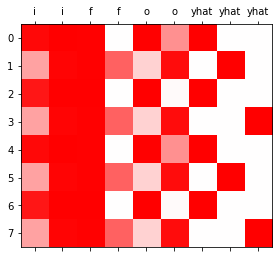

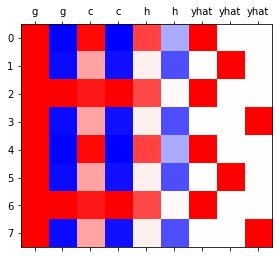

In [248]:
plt.matshow(combinded1[-8:].data,cmap='bwr',vmin=-1,vmax=1);
plt.xticks(range(combinded1.shape[-1]),labels=['i']*2+['f']*2+['o']*2+['yhat']*3);
plt.matshow(combinded2[-8:].data,cmap='bwr',vmin=-1,vmax=1);
plt.xticks(range(combinded2.shape[-1]),labels=['g']*2+['c']*2+['h']*2+['yhat']*3);

### 시각화의 해석I 

`-` input_gate, forget_gate, output_gate는 모두 0~1 사이의 값을 가진다. 

`-` 이 값들은 각각 모두 $g_t, c_{t-1}, \tanh(c_t)$에 곱해진다. 

`-` 따라서 input_gate, forget_gate, output_gate 는 gate의 역할로 비유가능하다. (1이면 통과, 0이면 차단)
- input_gate: $g_t$의 값을 얼만큼 통과시킬지 0~1사이의 숫자로 결정 
- forget_gate: $c_{t-1}$의 값을 얼만큼 통과시킬지 0~1사이의 숫자로 결정 
- output_gate: $\tanh(c_t)$의 값을 얼만큼 통과시킬지 0~1사이의 숫자로 결정 

### 시각화의 해석II

`-` 결국 ${\boldsymbol g}_t\to {\boldsymbol c}_t \to {\boldsymbol h}_t \to \hat{\boldsymbol y}$ 의 느낌이다. (${\boldsymbol h}_t$를 계산하기 위해서는 ${\boldsymbol c}_t$가 필요했고 ${\boldsymbol c}_t$를 계산하기 위해서는 ${\boldsymbol c}_{t-1}$과 ${\boldsymbol g}_t$가 필요했음) 

- ${\boldsymbol h}_t= \tanh({\boldsymbol c}_t) \odot {\boldsymbol o}_t$
- ${\boldsymbol c}_t ={\boldsymbol c}_{t-1} \odot {\boldsymbol f}_t + {\boldsymbol g}_{t} \odot {\boldsymbol i}_t$

`-` ${\boldsymbol g}_t,{\boldsymbol c}_t,{\boldsymbol h}_t$ 모두 ${\boldsymbol x}$의 정보를 숙성시켜 가지고 있는 느낌이 든다. 

`-` ${\boldsymbol g}_t$ 특징: 보통 -1,1 중 하나의 값을 가지도록 학습되어 있다. (마치 RNN의 hidden node처럼! 그리고 수식도 똑같음) 
- $\boldsymbol{g}_t = \tanh({\boldsymbol x}_t {\bf W}_{ig} + {\boldsymbol h}_{t-1} {\bf W}_{hg}+ {\boldsymbol b}_{ig}+{\boldsymbol b}_{hg})$

`-` ${\boldsymbol c}_t$ 특징: ${\boldsymbol g}_t$와 매우 비슷하지만 약간 다른값을 가진다. 그래서 꼭 -1,1 사이의 값을 가지는 것이 아니라 -1~1 사이의 값을 가지도록 조정이 되어있다. 

In [249]:
print("first row: gt={}, ct={}".format(g[-8].data, cell[-8].data))
print("second row: gt={}, ct={}".format(g[-7].data, cell[-7].data))
#g[-7], cell[-7]

first row: gt=tensor([ 0.9999, -0.9999]), ct=tensor([ 0.9647, -0.9984])
second row: gt=tensor([ 0.9970, -0.9554]), ct=tensor([ 0.3592, -0.9373])


`-` ${\boldsymbol h}_t$ 특징: (1) ${\boldsymbol c}_t$의 느낌이 있음 하지만 약간의 변형이 있음. (2) -1~1 사이에의 값을 훨씬 다양하게 가진다. (tanh때문)

In [251]:
print("first row: gt={}, ct={}, ht={}".format(g[-8].data, cell[-8].data,h[-8].data))
print("second row: gt={}, ct={}, ht={}".format(g[-7].data, cell[-7].data,h[-7].data))
#g[-7], cell[-7]

first row: gt=tensor([ 0.9999, -0.9999]), ct=tensor([ 0.9647, -0.9984]), ht=tensor([ 0.7370, -0.3323])
second row: gt=tensor([ 0.9970, -0.9554]), ct=tensor([ 0.3592, -0.9373]), ht=tensor([ 0.0604, -0.6951])


`-` 예전의문 해결
- 실험적으로 살펴보니 LSTM이 RNN보다 장기기억에 유리했음.
- 그 이유: RRN은 ${\boldsymbol h}_t$의 값이 -1 혹은 1로 결정되는 경우가 많았음. 그러나 경우에 따라서는 ${\boldsymbol h}_t$이 -1~1의 값을 가지는 것이 문맥적 뉘앙스를 포착하기에는 유리한데 LSTM이 이러한 방식으로 학습되는 경우가 많았음. 
- 왜 LSTM의 ${\boldsymbol h}_t$은 -1,1 이외의 값을 쉽게 가질 수 있는가? (1) gate들의 역할 (2) 마지막에 취해지는 tanh 때문 

### LSTM의 알고리즘 리뷰 I (수식위주)

**(step1)** calculate ${\tt ifgo}$

${\tt ifgo} = {\boldsymbol x}_t  \big[{\bf W}_{ii} | {\bf W}_{if}| {\bf W}_{ig} |{\bf W}_{io}\big] + {\boldsymbol h}_{t-1}  \big[ {\bf W}_{hi}|{\bf W}_{hf} |{\bf W}_{hg} | {\bf W}_{ho} \big] + bias$

$=\big[{\boldsymbol x}_t{\bf W}_{ii} + {\boldsymbol h}_{t-1}{\bf W}_{hi} ~\big|~ {\boldsymbol x}_t{\bf W}_{if}+ {\boldsymbol h}_{t-1}{\bf W}_{hf}~ \big|~ {\boldsymbol x}_t{\bf W}_{ig} + {\boldsymbol h}_{t-1}{\bf W}_{hg}  ~\big|~ {\boldsymbol x}_t{\bf W}_{io} + {\boldsymbol h}_{t-1}{\bf W}_{ho} \big] + bias$

**(step2)** decompose ${\tt ifgo}$ and get ${\boldsymbol i}_t$, ${\boldsymbol f}_t$, ${\boldsymbol g}_t$, ${\boldsymbol o}_t$

${\boldsymbol i}_t = \sigma({\boldsymbol x}_t {\bf W}_{ii} + {\boldsymbol h}_{t-1} {\bf W}_{hi} +bias )$ 

${\boldsymbol f}_t = \sigma({\boldsymbol x}_t {\bf W}_{if} + {\boldsymbol h}_{t-1} {\bf W}_{hf} +bias )$ 

${\boldsymbol g}_t = \tanh({\boldsymbol x}_t {\bf W}_{ig} + {\boldsymbol h}_{t-1} {\bf W}_{hg} +bias )$ 

${\boldsymbol o}_t = \sigma({\boldsymbol x}_t {\bf W}_{io} + {\boldsymbol h}_{t-1} {\bf W}_{ho} +bias )$ 

**(step3)** calculate ${\boldsymbol c}_t$ and ${\boldsymbol h}_t$

${\boldsymbol c}_t = {\boldsymbol i}_t \odot {\boldsymbol g}_t+ {\boldsymbol f}_t \odot {\boldsymbol c}_{t-1}$

${\boldsymbol h}_t = \tanh({\boldsymbol o}_t \odot {\boldsymbol c}_t)$

### LSTM의 알고리즘 리뷰 II (느낌위주)

- 이해 및 암기를 돕기위해서 비유적으로 설명한 챕터입니다..

`-` 느낌1: RNN이 콩물에서 간장을 한번에 숙성시키는 방법이라면 LSTM은 콩물에서 간장을 3차로 나누어 숙성하는 느낌이다. 
- 콩물: ${\boldsymbol x}_t$
- 1차숙성: ${\boldsymbol g}_t$
- 2차숙성: ${\boldsymbol c}_t$ 
- 3차숙성: ${\boldsymbol h}_t$ 

`-` 느낌2: ${\boldsymbol g}_t$에 대하여
- 계산방법: ${\boldsymbol x}_t$와 ${\boldsymbol h}_{t-1}$를 ${\bf W}_{ig}, {\bf W}_{hg}$를 이용해 선형결합하고 $\tanh$를 취한 결과
- RNN에서 간장을 만들던 그 수식임. RNN에서는 $g_t$자체가 간장의 역할을 하였음.
- 크게 2가지의 의미를 가진다 (1) 과거와 현재의 결합 (2) 활성화함수 $\tanh$를 적용 

`-` 느낌3: ${\boldsymbol c}_t$에 대하여 (1)
- 계산방법: ${\boldsymbol g}_{t}$와 ${\boldsymbol c}_{t-1}$를 요소별로 선택하고 더하는 과정
- RNN에서 간장을 만들던 수식중 (1) 과거와 현재의 정보를 결합하는 과정에 해당한다. 차이점은 요소별 선택 후 덧셈
- 이러한 결합을 쓰는 이유? 게이트를 이용하여 과거와 현재의 정보를 제어 (일반적인 설명, 솔직히 내가 좋아하는 설명은 아님)

`-` 느낌4: ${\boldsymbol c}_t$에 대하여 (2): ${\boldsymbol c}_t$는 왜 과거와 현재의 정보를 제어한다고 볼 수 있는가? 

$t=1$ 시점 계산과정관찰

In [266]:
input_gate[1],g[1],forget_gate[1],cell[0]

(tensor([0.9065, 0.9999], grad_fn=<SelectBackward0>),
 tensor([0.9931, 0.9999], grad_fn=<SelectBackward0>),
 tensor([0.9931, 0.0014], grad_fn=<SelectBackward0>),
 tensor([ 0.3592, -0.9373], grad_fn=<SelectBackward0>))

$[0.9,1.0] \odot {\boldsymbol g}_t + [1.0,0.0] \odot {\boldsymbol c}_{t-1}$

- forget_gate는 $c_{t-1}$의 첫번째 원소는 기억하고, 두번째 원소는 잊으라고 말하고 있음 // forget_gate는 과거($c_{t-1}$)의 정보를 얼마나 잊을지 (= 얼마나 기억할지) 를 결정한다고 해석할 수 있다. 
- input_gate는 $g_{t}$의 첫번째 원소와 두번째 원소를 모두 기억하되 두번째 원소를 좀 더 중요하게 기억하라고 말하고 있음 // input_gate는 현재($g_{t}$)의 정보를 얼만큼 강하게 반영할지 결정한다. 
- 이 둘을 조합하면 ${\boldsymbol c}_t$가 현재와 과거의 정보중 어떠한 정보를 더 중시하면서 기억할지 결정한다고 볼 수 있다. 

> 이 설명은 제가 좀 싫어해요, 싫어하는 이유는 (1) "기억의 정도를 조절한다"와 "망각의 정도를 조절한다"는 사실 같은말임. 그래서 forget_gate의 용어가 모호함. (2) 기억과 망각을 조정하는 방식으로 꼭 gate의 개념을 사용해야 하는건 아님

`-` 느낌5: ${\boldsymbol c}_t$에 대하여 (3) 

- 사실상 LSTM 알고리즘의 꽃이라 할 수 있음. 
- LSTM은 long short term memory의 약자임. 기존의 RNN은 장기기억을 활용함에 약점이 있는데 LSTM은 단기기억/장기기억 모두 잘 활용함. 
- LSTM이 장기기억을 잘 활용하는 비법은 바로 ${\boldsymbol c}_t$에 있다.

`-` 느낌6: ${\boldsymbol h}_t$에 대하여
- 계산방법: ${\boldsymbol c}_t$를 요소별로 선택후 $\tanh$ 

`-` RNN, LSTM의 변수들 비교 테이블 

||과거정보|현재정보|과거와 현재의 결합방식|활성화|느낌|비고|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|RNN-${\boldsymbol h}_t$|${\boldsymbol h}_{t-1}$|${\boldsymbol x}_t$|$\times$ $\to$ $+$|$\tanh$|간장|
|||||||
|LSTM-${\boldsymbol g}_t$|${\boldsymbol h}_{t-1}$|${\boldsymbol x}_t$|$\times$ $\to$ $+$|$\tanh$|1차숙성간장|
|LSTM-${\boldsymbol c}_t$|${\boldsymbol c}_{t-1}$|${\boldsymbol g}_t$|$\odot$ $\to$ $+$ |None|2차숙성간장|gate를 열림정도를 판단할때 ${\boldsymbol x}_t$와 ${\boldsymbol h}_{t-1}$을 이용|
|LSTM-${\boldsymbol h}_t$|None|${\boldsymbol c}_t$|None|$\tanh$|3차숙성간장|gate를 열림정도를 판단할때 ${\boldsymbol x}_t$와 ${\boldsymbol h}_{t-1}$을 이용|


- RNN은 기억할 과거정보가 ${\boldsymbol h}_{t-1}$ 하나이지만 LSTM은 ${\boldsymbol c}_{t-1}$, ${\boldsymbol h}_{t-1}$ 2개이다. 

### LSTM이 강한이유 

`-` LSTM이 장기기억에 유리함. 그 이유는 input, forget, output gate 들이 서로 상호작용하며 과거기억을 위한 역할을 하기 때문. 
- 비판: 아키텍처에 대한 이론적 근거는 없음. 장기기억을 위하여 꼭 LSTM같은 구조일 필요는 없음. 

## 참고자료들 

- https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
- https://arxiv.org/abs/1402.1128